In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Capstone Project: Analytic Report on Stanfords Deep Solar and Future Research Avenues 
### By Mitch Shiles 

In [26]:
df = pd.read_csv('deepsolar_tract.csv', encoding='latin1')

In [89]:
census =pd.read_csv('Census Data Lower 48.csv')
#pd.read_csv('nst-est2018-01.csv')

census

,State_Name,2010 Census,2018 Estimate
0,.Alabama,"4,779,736","4,887,871"
1,.Arizona,"6,392,017","7,171,646"
2,.Arkansas,"2,915,918","3,013,825"
3,.California,"37,253,956","39,557,045"
4,.Colorado,"5,029,196","5,695,564"
5,.Connecticut,"3,574,097","3,572,665"
6,.District of Columbia,"601,723","702,455"
7,.Delaware,"897,934","967,171"
8,.Florida,"18,801,310","21,299,325"
9,.Georgia,"9,687,653","10,519,475"


## What Locations have the Highest 

#### 

In [28]:
#Question1
#What locations have the highest per capita usage of solar power 
#what locations have the highest usage of solar 
# create a map showing the density of various types of solar installations 
#organize type Residential and non residential by color 
#and scale plot points by the area of the solar installation 
#Bar Chart of each state and their per capita Solar usage 

#problem with false reporting of data Vermont has had net metering for much longer

/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


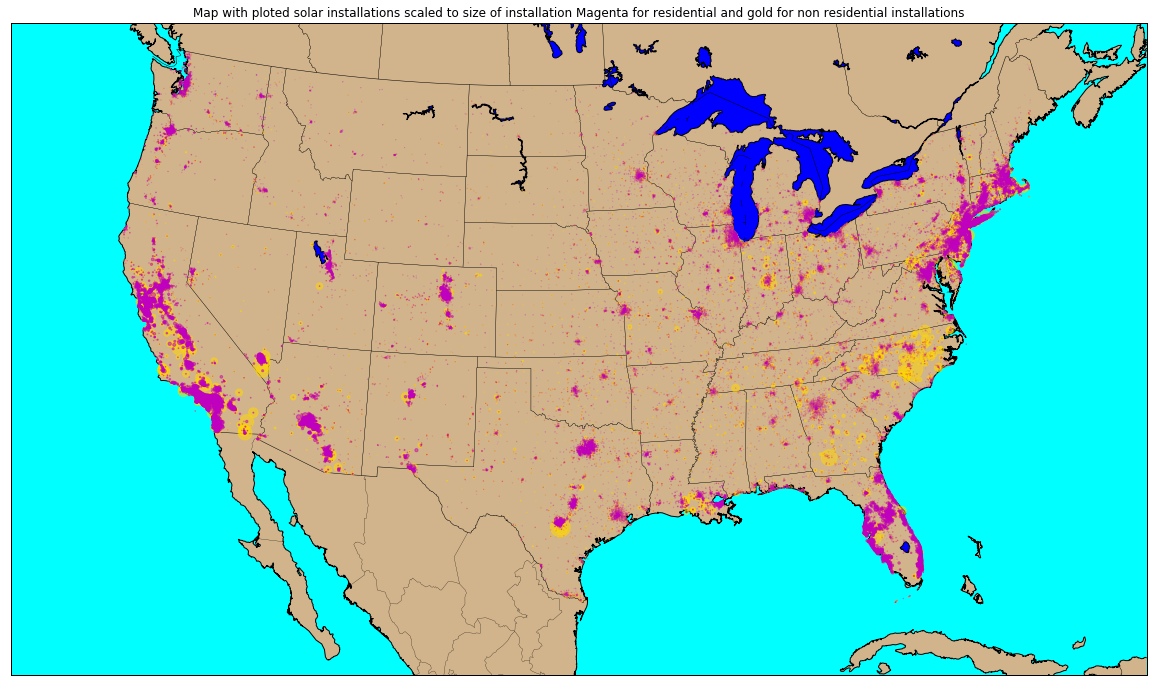

In [29]:
#llcr=18.892007, -123.742010
#urcr=48.572002, -60.451053
#mid=39.156135, -94.742782

#Get county, state, solar pannel area, latitude and longitude data from Deep Solar Dataset
energytype = df.loc[:,['county', 'state','lat', 'lon','total_panel_area',"total_panel_area_nonresidential","total_panel_area_residential"]]

#Determine figure size 
plt.figure(figsize=(24,12))

#create map lcc projection of united states 
map = Basemap(llcrnrlon=-125.,llcrnrlat=20.,urcrnrlon=-60.,urcrnrlat=47.,projection='lcc',lat_1=20.,lat_2=40.,lon_0=-100., resolution='i', area_thresh=1000.)
#fill in colors draw boundries for countries and states 
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='tan',lake_color='blue')
map.drawcountries(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
map.drawstates(linewidth=0.25, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
map.drawcoastlines()

#map.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
#map.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
plt.title('Map with ploted solar installations scaled to size of installation Magenta for residential and gold for non residential installations')

lons = energytype['lon'].to_numpy()
lats = energytype['lat'].to_numpy()
#x, y = map(lons, lats)

x, y = map(lons, lats)

#s=(energytype['total_panel_area']/10000)

map.scatter(x, y,s=(energytype['total_panel_area_nonresidential']/1000),color='gold', alpha=.5, zorder=9)

map.scatter(x, y,s=(energytype['total_panel_area_residential']/1000),color='m', alpha=.5, zorder=10)


plt.show()


In [126]:
# states indecies are 7-57 first column are states second is 2010 census 
#district of columbia and delawar eneed to be switched 
#print (census.iloc[8:59,0:2])

#print(census.loc['1'])
#print(state_solarData['state'])
#plt.figure(figsize=(24,12))


state_solarData = df.groupby('state')

#state_abrev=[]
#net_metering=[]
panel_area_res=[]

#census['state_abrev']= state_df['state']
#census['net_metering']= state_df['net_metering'].mean()
#census['total_panel_area_residential']= state_solarData['total_panel_area_residential'].sum()

for state, state_df in state_solarData:
    state_abrev.append(state)
    net_metering.append(state_df['net_metering'].mean())
    print(state_df['total_panel_area_residential'].sum())
    panel_area_res.append(state_df['total_panel_area_residential'].sum())


panel_area_res

#census['state_abrev']= state_df['state']
#census['net_metering']= state_df['net_metering'].mean()
#census['total_panel_area_residential']= state_solarData['total_panel_area_residential'].sum()



#census['total_panel_area_residential'] = panel_area_res
#len(net_metering)
#panel_area_res
#census
#print(state_abrev,panel_area_res)
#plt.scatter(state_df['net_metering'].mean(), (state_df['total_panel_area_residential'].sum()))


[41724.300459467515,
 28445.33946162902,
 2600036.5224297466,
 15808856.657640547,
 715760.2127006153,
 423229.50855356315,
 51045.11173276231,
 94764.86164118203,
 3722420.6527112313,
 83448.6250755447,
 46760.663598016545,
 24671.397835694057,
 119043.54075974209,
 60780.75928247351,
 37679.70382751624,
 34406.04283747509,
 559008.2243495139,
 1076336.931317416,
 459189.706715622,
 11876.5721055357,
 103329.00771299467,
 66472.47902047557,
 133081.9546038108,
 24267.24186729638,
 19538.668354068126,
 124226.860219222,
 6756.391298915491,
 22429.99325213837,
 36742.57268383724,
 1300536.059519833,
 316856.9978341841,
 983350.2035488934,
 1374143.6902147562,
 118300.80188117563,
 42426.78282851849,
 320336.88221336604,
 236160.89958045862,
 32695.69770557969,
 139238.31317462193,
 5659.04626269903,
 59644.13340682202,
 851334.291127312,
 294740.73343933315,
 78323.61043787707,
 13134.87412635215,
 263045.9150926842,
 64556.80603458974,
 11788.52307101219,
 10403.208744919271]

In [48]:
#Question2 
#What effect does income level, education level, and Political persuasion have on the adoption of solar technology 

In [40]:
#Question3 What locations 

In [41]:
#Future Experimentation 
#Using the information from rooftop solar 
#try to determine a target demographic to market solar pannels too
# determine what is hindering certain people from adopting the technology 
#ie: cost prohibitive, assumed risk, inadequet space or location, misinformation, 
#aestetics, social or political inhibition. 

# Using data that shows the hourly power consumption in megawatts per region 
# and roof top angle dataset determine the maximum solar capacity that could be installed 
# before energy storage becomes nessescary. 
